# Predicting heart disease for patients



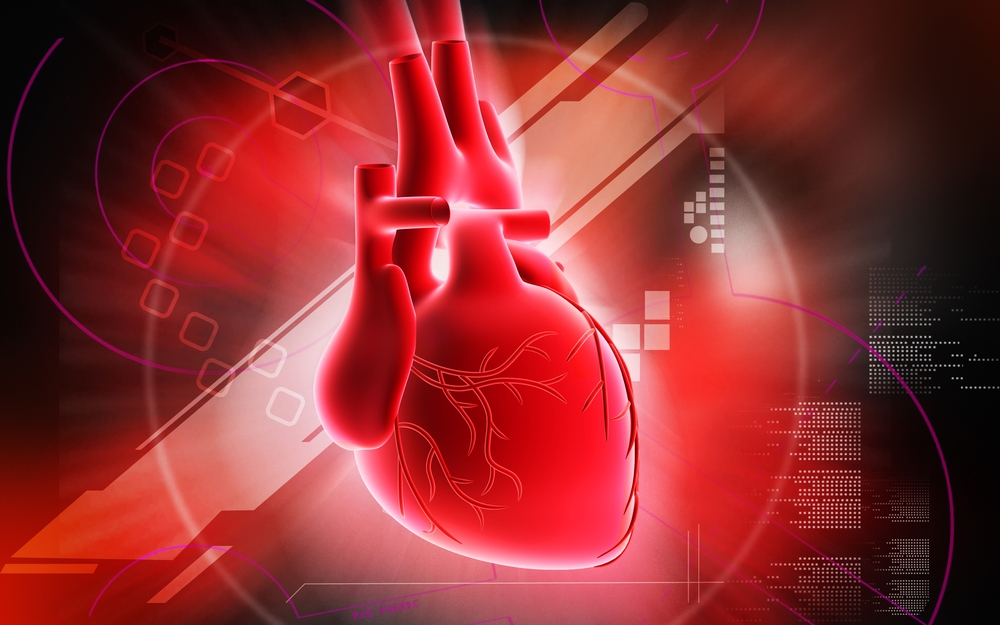

## I. Importing the data and essential libraries

In [ ]:
import pandas as pd   #python library for data manipulation
import numpy as np    #(Numerical Python): python library used for working with arrays
import matplotlib.pyplot as plt #Python library for visualisation (plotting)
import seaborn as sns   #Python data visualization library based on matplotlib

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## II. Understanding our dataset

In [ ]:
# import using ur drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# import using the CSV file AFTER uploading it in ur directory
#df = pd.read_csv("/content/drive/My Drive/heart.csv")
df = pd.read_csv("/content/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(df)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:
 #Return a tuple representing the dimensionality of the DataFrame.(Number of rows,Number of columns)
df.shape

(303, 14)

#### Printing out a few columns
Any null, nan values? Any incoherent values or outliers? Any irrelevant or duplicate columns?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Dataset columns:
* age
* sex (1 = male; 0 = female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

In [ ]:
df.head(5)   #return the first n rows (we can use dataset.tail(n) to show the last n rows )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### IS IT A CLEAR DESCRIPTION OF DATA ? WHAT DO YOU THINK ABOUT :

* **chest pain type COLUMN**

* **resting electrocardiographic results COLUMN**

* **slope COLUMN**

* **thal COLUMN**

* **target COLUMN**

+ There are some rows in theoriginal  dataset containing some NaNs (so they should be removed) Let's check if we have some NULL values here!






# Back on verifying the DATA ! (NEW DATA)

* age: age in years

* sex: sex (1 = **male**; 0 = **female**)
* cp: chest pain type
  - Value 0: **typical angina**

  - Value 1: **atypical angina**
  - Value 2: **non-anginal pain**
  - Value 3: **asymptomatic**
* trestbps: resting **blood pressure** (in mm Hg on admission to the hospital)
* chol: serum **cholestoral** in mg/dl
* fbs: (fasting **blood sugar** > 120 mg/dl) (1 = **true**; 0 = **false**)
* restecg: resting electrocardiographic results
  - Value 0: **normal**

  - Value 1: having **ST-T wave abnormality**(T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite **left ventricular** hypertrophy by Estes' criteria
* thalach: **maximum heart rate** achieved
* exang: exercise **induced angina** (1 = yes; 0 = no)
* oldpeak = **ST depression** induced by exercise relative to rest
* slope: the slope of the **peak** exercise ST segment
  - Value 0: **upsloping**
  - Value 1: **flat**
  - Value 2: **downsloping**
* ca: number of **major vessels** (0-3) colored by flourosopy
* thal: A **blood disorder** called thalassemia
  - 0 = **normal**;
  - 1 = **fixed defect**;
  - 2 = reversable defect
*Condition:
  - Value 0 = **No Disease**;
  - Value 1 = **Disease**;


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset=df.dropna()

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis (EDA)

In [ ]:
#Return a random sample of rows
dataset.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0


In [ ]:
dataset.shape

(303, 14)

DESCRIBE() :

*   **MEAN** :Mean values for each column
*   **STD** : Standard Deviation sqrt((Σ(x - mean)²/n))
*   **MIN** : return the smallest value for earch column

References :
- resting blood pressure : 120 millimetres of mercury
- serum cholestoral : Less than 200
- fasting blood sugar : less than 120

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
###Luckily, we have no missing values

Exploratory Data Analysis (EDA)

#### => Clearly, this is a classification problem, with the target variable having values '0' and '1'

#### Analysing the 'Target' variable

In [ ]:
dataset.rename(columns = {'condition':'target'}, inplace = True)

In [ ]:
dataset["target"].nunique() #number of unique values

2

In [ ]:
dataset["target"].unique() #returns all unique values

array([1, 0])

## Feature Selection


### SelectKBest

SelectKBest class can be used to select a specific number of features in a suite of different statistical tests.

In this case we are using **chi-squared (chi2)** statistical test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = dataset.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column

In [ ]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit(X,y)

In [ ]:
fit

SelectKBest(k=13, score_func=<function chi2 at 0x7dc1ce6fe200>)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trestbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalach,188.320472
8,exang,38.914377
9,oldpeak,72.644253


In [ ]:
print(featureScores.nlargest(13,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08317623 0.03170461 0.12850806 0.07487912 0.07730903 0.00886004
 0.0190281  0.10955782 0.05776258 0.10871801 0.05197453 0.12890056
 0.11962128]


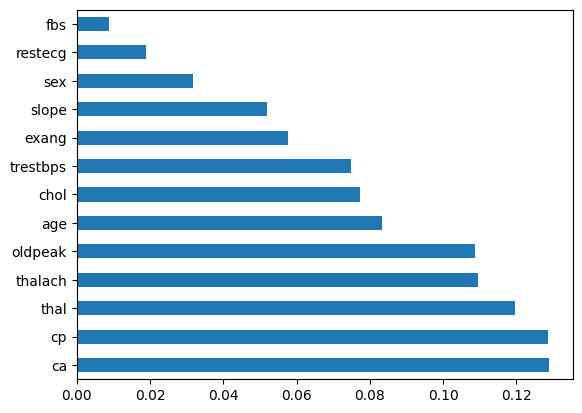

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

###Correlation Matrix with Heatmap

![picture|20%](https://i.ibb.co/LQPH1yD/correlation.png)

In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

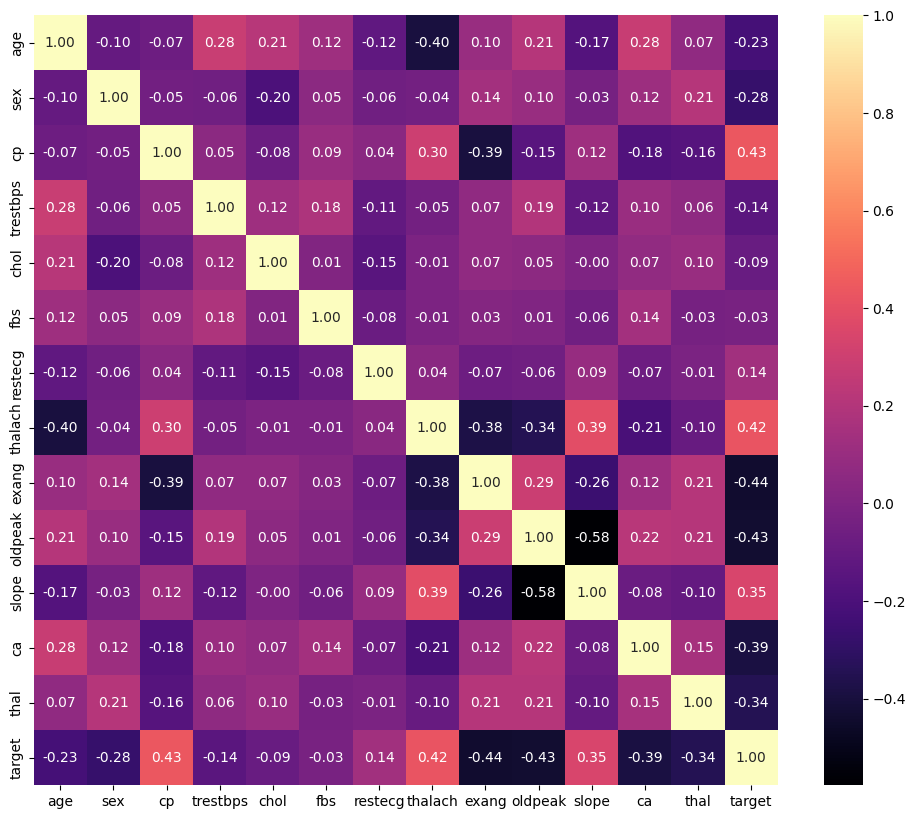

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="magma",fmt='.2f')

##Data Visualization

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [ ]:
df2 = dataset.copy()

def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
df2['target'] = df2['target'].apply(chng2)

In [ ]:
df2.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
51,66,male,0,120,302,0,0,151,0,0.4,1,0,2,Heart Disease
135,49,female,0,130,269,0,1,163,0,0.0,2,0,2,Heart Disease
162,41,male,1,120,157,0,1,182,0,0.0,2,0,2,Heart Disease
209,59,male,0,140,177,0,1,162,1,0.0,2,1,3,No Heart Disease
201,60,male,0,125,258,0,0,141,1,2.8,1,1,3,No Heart Disease


In [ ]:
df2['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender visualisation\n')

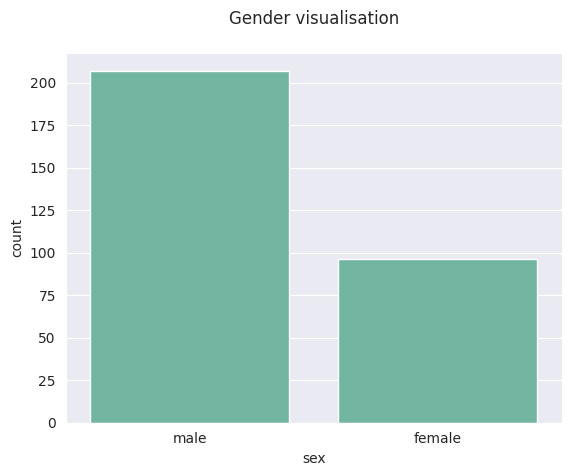

In [ ]:
sns.countplot(data= df2, x='sex')
plt.title('Gender visualisation\n')

Text(0.5, 1.0, 'Gender v/s target\n')

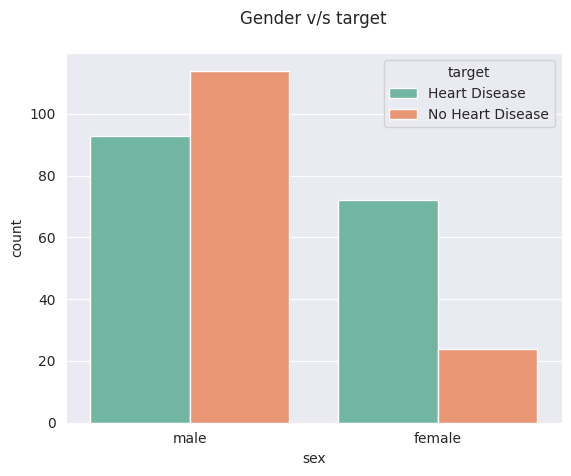

In [ ]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

=> Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men between 70% — 89%.

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

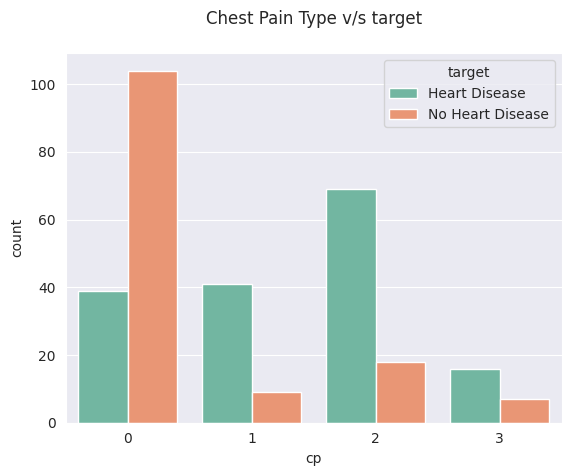

In [ ]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

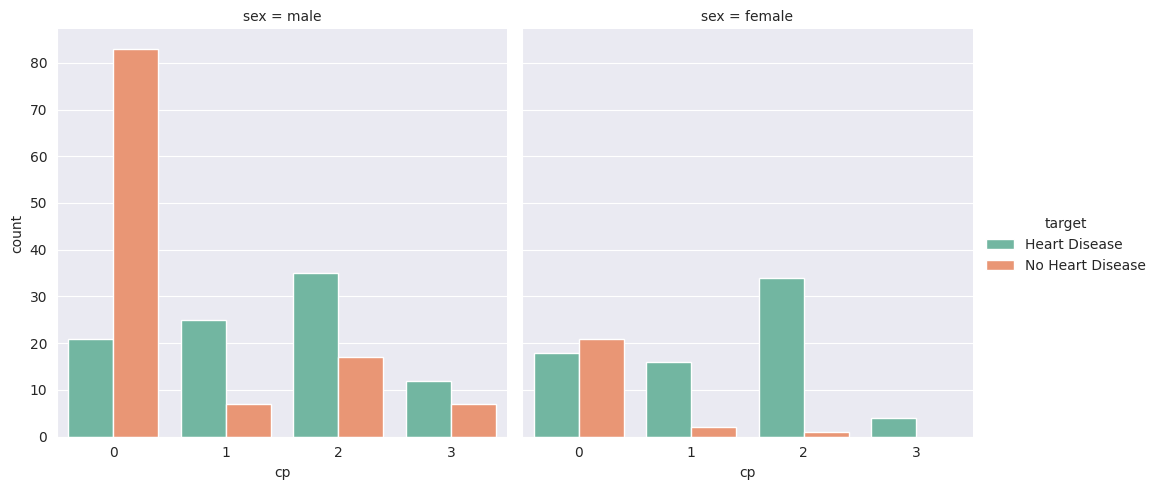

In [ ]:
sns.catplot(x="cp", hue="target", col="sex",
                data=df2, kind="count",
                )

cp: chest pain type
  - Value 0: **typical angina**

  - Value 1: **atypical angina**
  - Value 2: **non-anginal pain**
  - Value 3: **asymptomatic**

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

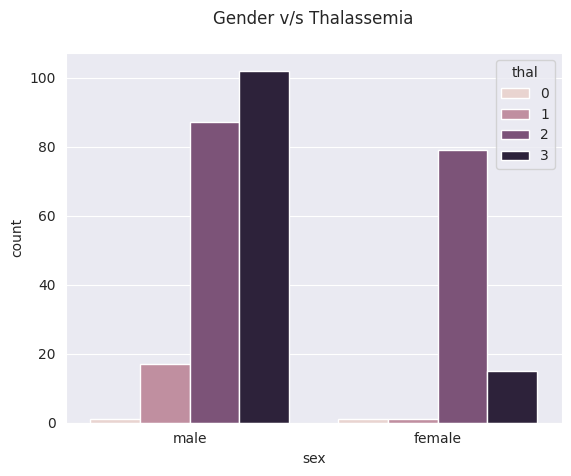

In [ ]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')

* thal: A **blood disorder** called thalassemia
  - 0 = **normal**;
  - 1 = **fixed defect**;
  - 2 = reversible defect

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

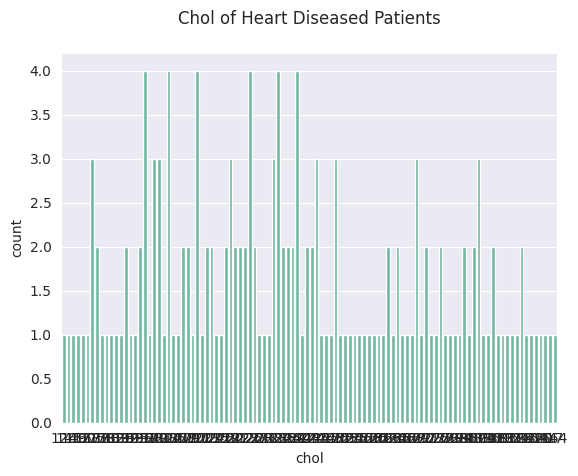

In [ ]:
sns.countplot(data= df2[df2['target']=='Heart Disease'], x='chol')
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

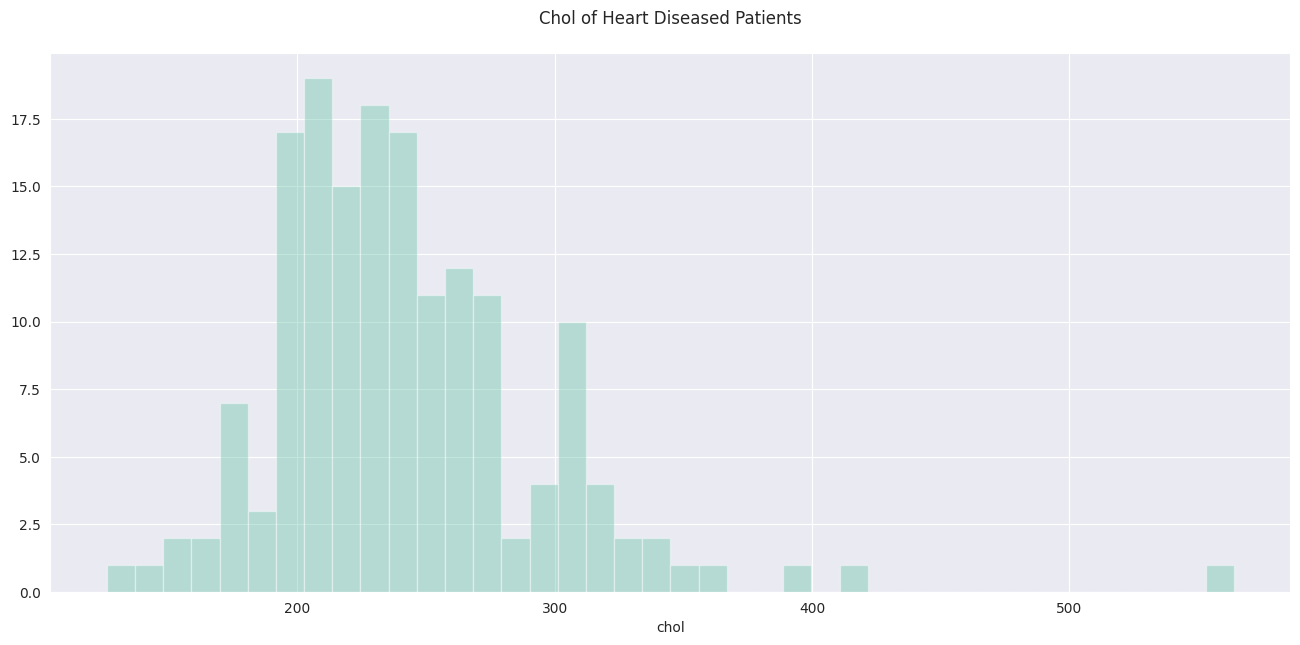

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df2[df2['target']=='Heart Disease']['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'cholestoral in mg/dl / No Heart Disease \n')

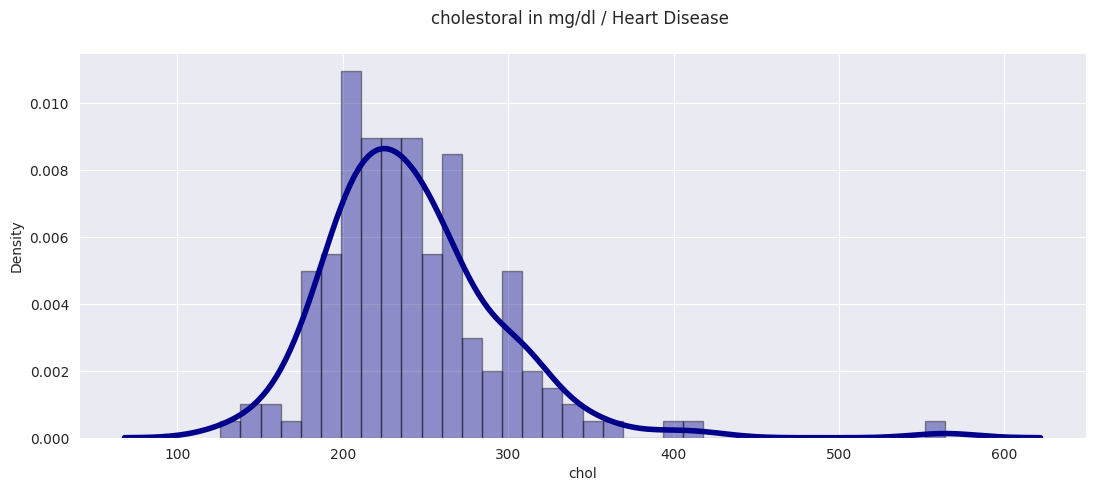

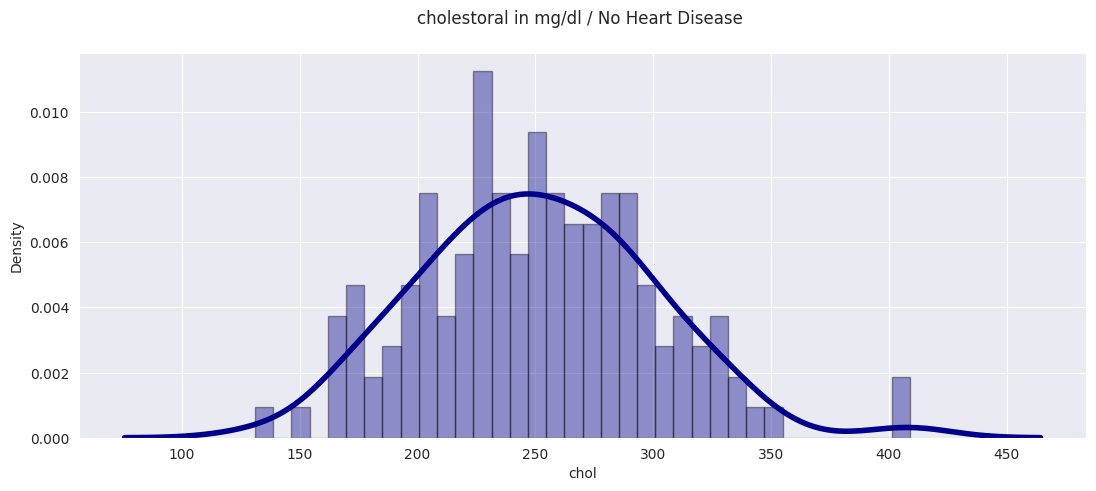

In [ ]:
plt.figure(figsize=(13,5))
sns.distplot(df2[df2['target']=='Heart Disease']['chol'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('cholestoral in mg/dl / Heart Disease \n')



plt.figure(figsize=(13,5))
sns.distplot(df2[df2['target']=='No Heart Disease']['chol'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('cholestoral in mg/dl / No Heart Disease \n')


Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

BOXPLOT
![picture](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

<Axes: xlabel='target', ylabel='age'>

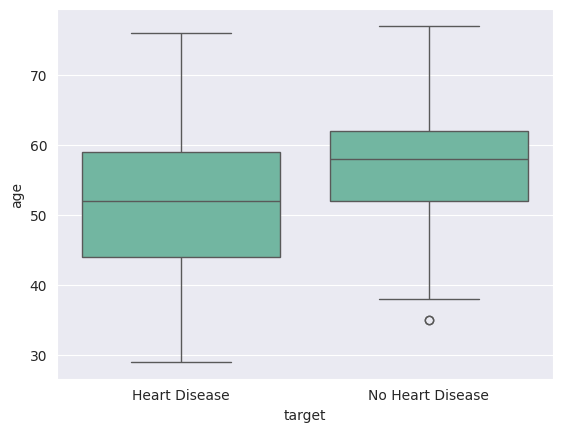

In [ ]:
sns.boxplot(data=df2,x='target',y='age')


<Axes: xlabel='target', ylabel='thalach'>

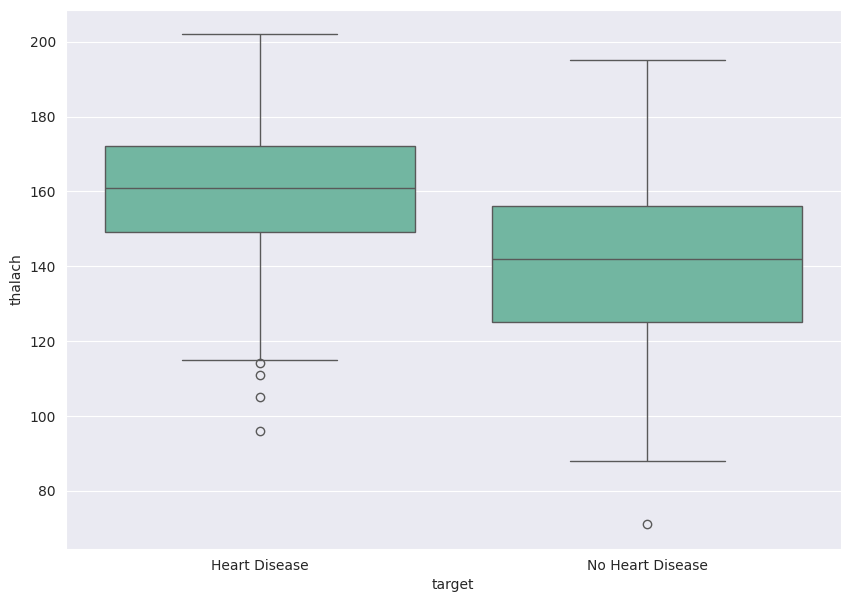

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='target',y='thalach')

# IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

# V. Model Fitting





### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
#Value 0 = No Disease;
#Value 1 = Disease;
Y_pred_lr

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


In [ ]:
score_lr_2 = lr.score(X_test.values,Y_test)
score_lr_2

0.8852459016393442

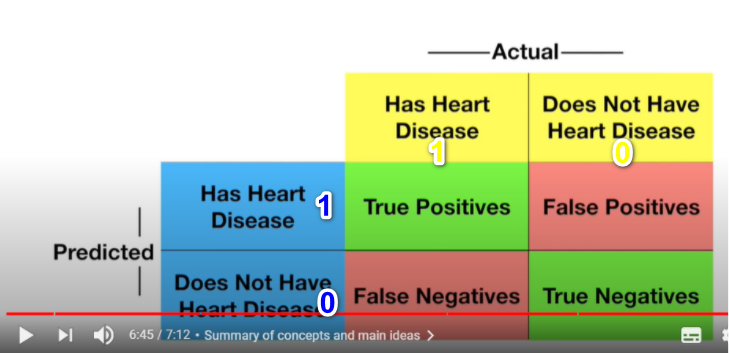

# Evaluating the performance of our model
Using the photo , Some of the used metrics for classification problems are:

*   Accuracy:  **Correct Predictions / Total Number of Test Samples**
        Accuracy ↗ Predicted Value is Correct ↗
*   Precision: **True Positives / Total Number of Predicted Positives**
        Precision ↗ Predicted Positive is True ↗ <=> Precision is the proportion of positive results that were correctly classified
*   Recall = sensitivity: **True Positives / Total Number of Test Positives**
        Recall ↗ Number of Predicted True Positives ↗
*   F1Score: **2 * (Precision*Recall)/(Precision+Recall)**
        F1Score ↗ Balance between Precision and Recall ↗

In [ ]:
#Defining a function to evaluate the performance of a model using the metrics introduced above
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, log_loss
def classifier_evaluation(test,prediction,probabilities):

  print('Accuracy: ' + str(accuracy_score(test, prediction)))
  print('F1Score: ' + str(f1_score(test, prediction)))
  print('Precision: ' + str(precision_score(test, prediction)))
  print('Recall: ' + str(recall_score(test, prediction)))
  print('LogLoss: ' + str(log_loss(test, probabilities, eps=1e-15)))


Evaluation of Logistic Regression

In [ ]:
classifier_evaluation(Y_test,Y_pred_lr,Y_pred_lr_proba)

Accuracy: 0.8852459016393442
F1Score: 0.8923076923076922
Precision: 0.8787878787878788
Recall: 0.90625
LogLoss: 0.36372514439094206


### Let's try another algorithm


### SVM ; Support Vector Machine

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)


In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.89 %


In [ ]:
#Defining a function to show the confusion matrix independently of the model
from sklearn import metrics
def confusion_matrix_creation(test, prediction,score):

  cm = metrics.confusion_matrix(prediction,test )
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
  plt.ylabel('Predicted label')
  plt.xlabel('Actual label')
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15)
  return(cm)

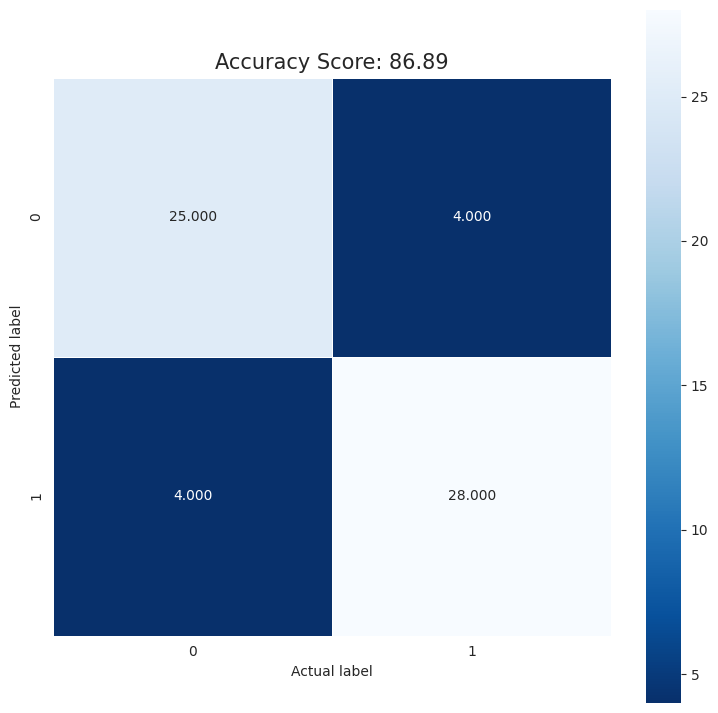

In [ ]:
#for the SVM :
cm_svm=confusion_matrix_creation(Y_test, Y_pred_svm,score_svm)

In [ ]:
#defining a function to calculate sensitivity and specifity :
# Sensitivity is the true positive rate, and specificity is the true negative rate:
def sens_specf(cm1):
  sensitivity1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
  print('Sensitivity : ', sensitivity1 )
  specificity1 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
  print('Specificity : ', specificity1)

In [ ]:
print('Using SVM Model :')
sens_specf(cm_svm)


Using SVM Model :
Sensitivity :  0.875
Specificity :  0.8620689655172413


### **ROC_AUC** :
ROC: Receiver Operating Characteristic \\
AUC: Area Under the ROC Curve
- how much the machine learning model is good at distinguishing the given classes.
- **Ideal value for AUC is 1.**


In [ ]:
from sklearn.metrics import roc_auc_score
def roc_auc(testy,probs):
  auc = roc_auc_score(testy, probs)
  print('AUC: %.2f' % auc)
  print('================')

In [ ]:
print("Logistic regression")
probs_lr = Y_pred_lr_proba[:, 1]
roc_auc(Y_test,probs_lr)

Logistic regression
AUC: 0.92


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

85.25
2


In [ ]:
best_x

2

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 85.25 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 83.61 %


### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 10.0499 - accuracy: 0.4091
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 6.8358 - accuracy: 0.3347
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 5.8564 - accuracy: 0.3471
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 5.8724 - accuracy: 0.3595
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 5.6200 - accuracy: 0.3595
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 5.2460 - accuracy: 0.3471
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 5.0518 - accuracy: 0.3430
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 4.7078 - accuracy: 0.3430
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 4.3867 - accuracy: 0.3843
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 4.1582 - accuracy: 0.3512
Epoch 11/300
8/8 [==========

In [ ]:
Y_pred_nn = model.predict(X_test )

2/2 [==============================] - 0s 6ms/step


In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 88.52 %


Realised by :
* Chadha Ben Tamrout